In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

29.334692483374894 92.67976965639036
37.93973427372414 -65.39994057771713
-56.90010959638489 -177.75802272964899
-63.100750506632714 -107.64824225288478
-12.92567253837261 -96.73621790258007
-5.838969982763629 -13.184162869574777
-65.37476400579587 -13.466648463693673
-36.29999005537304 -151.446146249536
-63.945906434740934 49.9447811028148
-72.31375661459533 -89.57470742189167
65.81844805347453 -97.01124593536852
-30.927793497046558 29.84785382655255
-22.682118206142704 53.57644734896658
26.613411438844807 168.79309687887553
37.84152467135412 163.3397200151025
17.22835338212313 -65.89306473738203
-14.753187877959434 -158.80181096594828
40.48066108168939 -21.39831148906842
12.494323058367854 66.78868297352574
-74.5032978938728 -45.53471726075472
5.421132336918589 94.69589283054557
-61.93019661478429 -155.435099346451
-20.05042009888949 155.75671160552076
26.89138434786075 -26.57401687992632
-14.86776857551554 172.27550401460724
-22.637434145492534 -123.57036499636915
15.415264206973092

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

lasa cn
saint george bm
vaini to
punta arenas cl
puerto ayora ec
georgetown sh
cape town za
mataura pf
east london za
punta arenas cl
thompson ca
margate za
saint-leu re
butaritari ki
severo-kurilsk ru
arroyo us
avarua ck
vila franca do campo pt
kavaratti in
ushuaia ar
banda aceh id
mataura pf
yeppoon au
los llanos de aridane es
sola vu
rikitea pf
baillif gp
necochea ar
sentyabrskiy ru
barentsburg sj
taolanaro mg
warqla dz
kyaikkami mm
mataura pf
lolua tv
esperance au
barrow us
rikitea pf
busselton au
atuona pf
palabuhanratu id
bargal so
rikitea pf
tiksi ru
nizhneyansk ru
mount gambier au
codrington ag
murupara nz
hilo us
bethel us
ushuaia ar
rikitea pf
kavieng pg
avera pf
avarua ck
seara br
new norfolk au
bluffton us
canico pt
lavrentiya ru
meulaboh id
bredasdorp za
mount isa au
halifax ca
uyuni bo
sindand af
yellowknife ca
avera pf
north platte us
husavik is
bluff nz
tautira pf
busselton au
cidreira br
qaanaaq gl
hithadhoo mv
dessalines ht
kungurtug ru
sainte-thecle ca
lafayette us
m

In [7]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

608

In [8]:
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lasa
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | margate
Processing Record 12 of Set 1 | saint-leu
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | severo-kurilsk
Processing Record 15 of Set 1 | arroyo
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | vila franca do campo
Processing Record 18 of Set 1 | kavaratti
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | banda aceh
Processing Record 21 of Set 1 | yeppoon
Processing Record 22 of Set 1 | los llanos de aridane
Process

In [12]:
len(city_data)

558

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lasa,46.6166,10.7002,67.08,92,1,2.21,IT,2022-07-25 03:18:57
1,Saint George,37.1041,-113.5841,93.79,24,0,3.44,US,2022-07-25 03:18:58
2,Vaini,-21.2000,-175.2000,77.16,78,20,9.22,TO,2022-07-25 03:18:58
3,Punta Arenas,-53.1500,-70.9167,35.71,69,0,19.57,CL,2022-07-25 03:18:59
4,Puerto Ayora,-0.7393,-90.3518,69.55,92,100,5.01,EC,2022-07-25 03:18:59
5,Georgetown,5.4112,100.3354,84.88,79,40,3.44,MY,2022-07-25 03:15:51
6,Cape Town,-33.9258,18.4232,57.38,78,0,2.30,ZA,2022-07-25 03:18:49
7,Mataura,-46.1927,168.8643,45.48,86,80,4.36,NZ,2022-07-25 03:19:00
8,East London,-33.0153,27.9116,58.50,58,100,5.10,ZA,2022-07-25 03:19:00
9,Thompson,55.7435,-97.8558,57.36,67,40,0.00,CA,2022-07-25 03:15:55


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.tail(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
548,Sabaudia,IT,2022-07-25 03:33:20,41.3003,13.0282,72.79,98,0,3.11
549,Tirumullaivasal,IN,2022-07-25 03:33:20,11.2333,79.8333,86.14,61,100,6.17
550,Chake Chake,TZ,2022-07-25 03:33:21,-5.2459,39.7666,72.07,81,13,8.05
551,Merritt,CA,2022-07-25 03:30:48,50.1123,-120.7942,73.51,50,91,0.58
552,Sarahan,IN,2022-07-25 03:34:21,31.5167,77.8000,68.95,86,86,5.10
553,Isla Mujeres,MX,2022-07-25 03:34:21,21.2311,-86.7310,84.25,84,86,11.07
554,Toora-Khem,RU,2022-07-25 03:34:22,52.4675,96.1100,50.04,89,91,7.29
555,Jalu,LY,2022-07-25 03:34:22,29.0331,21.5482,77.45,36,0,7.34
556,Darhan,MN,2022-07-25 03:34:22,49.4867,105.9228,64.72,66,87,3.40
557,La Spezia,IT,2022-07-25 03:34:23,44.1105,9.8434,77.07,83,0,4.16


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658802299.3710122

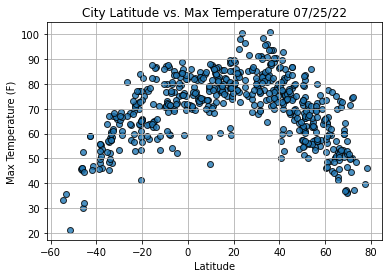

In [29]:
# Import time module
import time

#Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig1.png")

#show plot.
plt.show()

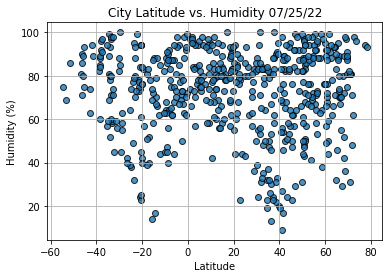

In [30]:
# Import time module
import time

#Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig2.png")

#show plot.
plt.show()

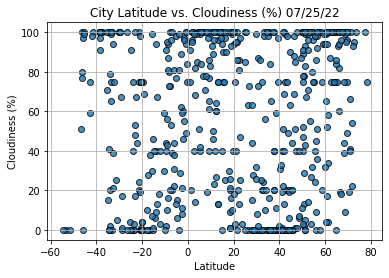

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

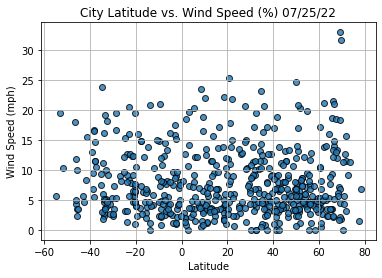

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (%) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [39]:
# Import linregress
from scipy.stats import linregress

In [40]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
       # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [41]:
index13 = city_data_df.loc[13]
index13

City               Severo-Kurilsk
Country                        RU
Date          2022-07-25 03:19:02
Lat                       50.6789
Lng                       156.125
Max Temp                     51.6
Humidity                       97
Cloudiness                    100
Wind Speed                  17.05
Name: 13, dtype: object

In [43]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lasa,IT,2022-07-25 03:18:57,46.6166,10.7002,67.08,92,1,2.21
1,Saint George,US,2022-07-25 03:18:58,37.1041,-113.5841,93.79,24,0,3.44
5,Georgetown,MY,2022-07-25 03:15:51,5.4112,100.3354,84.88,79,40,3.44
9,Thompson,CA,2022-07-25 03:15:55,55.7435,-97.8558,57.36,67,40,0.00
10,Margate,GB,2022-07-25 03:19:00,51.3813,1.3862,66.31,85,100,3.00
...,...,...,...,...,...,...,...,...,...
553,Isla Mujeres,MX,2022-07-25 03:34:21,21.2311,-86.7310,84.25,84,86,11.07
554,Toora-Khem,RU,2022-07-25 03:34:22,52.4675,96.1100,50.04,89,91,7.29
555,Jalu,LY,2022-07-25 03:34:22,29.0331,21.5482,77.45,36,0,7.34
556,Darhan,MN,2022-07-25 03:34:22,49.4867,105.9228,64.72,66,87,3.40


In [44]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lasa,IT,2022-07-25 03:18:57,46.6166,10.7002,67.08,92,1,2.21
1,Saint George,US,2022-07-25 03:18:58,37.1041,-113.5841,93.79,24,0,3.44
5,Georgetown,MY,2022-07-25 03:15:51,5.4112,100.3354,84.88,79,40,3.44
9,Thompson,CA,2022-07-25 03:15:55,55.7435,-97.8558,57.36,67,40,0.00
10,Margate,GB,2022-07-25 03:19:00,51.3813,1.3862,66.31,85,100,3.00


In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

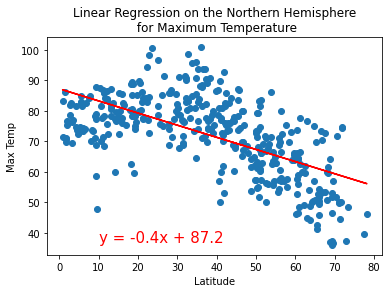

In [69]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 
                       'Max Temp',(10,37))

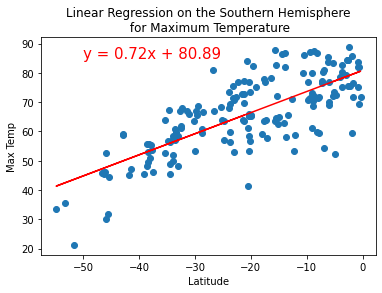

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 
                       'Max Temp',(-50,85))

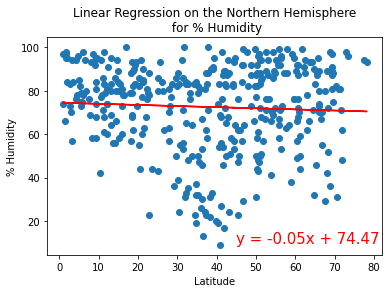

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', 
                       '% Humidity',(45,10))

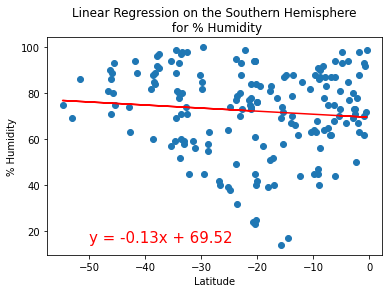

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', 
                       '% Humidity',(-50,15))

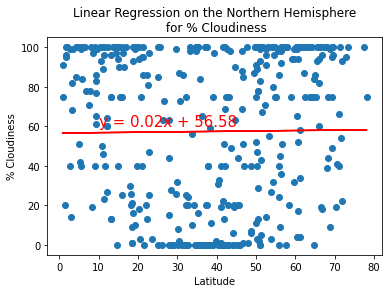

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness', 
                       '% Cloudiness',(10,60))

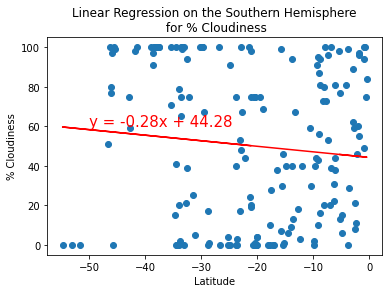

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness', 
                       '% Cloudiness',(-50,60))

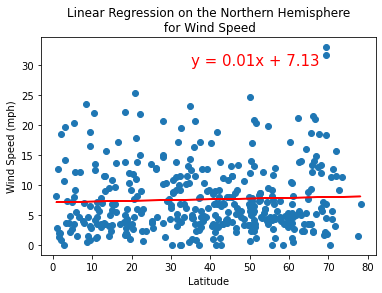

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed', 
                       'Wind Speed (mph)',(35,30))

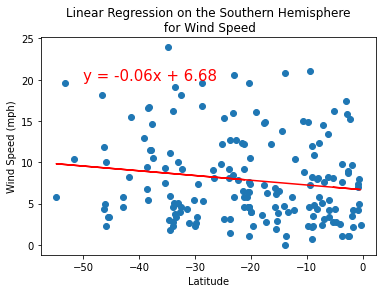

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed', 
                       'Wind Speed (mph)',(-50,20))